In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from utils import plot_2d, plot_classifier_boundary, test_model, test_model_with_standard_scaler
from sklearn.metrics import roc_auc_score

# POLY performing better

In [2]:
def G_SVC_poly():

 
    X, y = datasets.make_blobs(
        n_samples=[100, 5000], 
        centers=[(3,5),(6,5)],             
        n_features=2, 
        cluster_std=[0.5, 1],
        random_state=42, 
        shuffle=False)


    return X, y

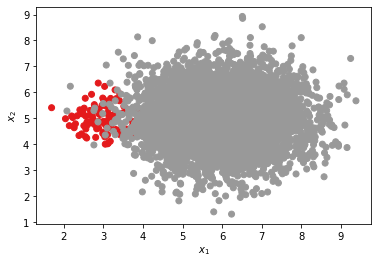

In [3]:
X_poly, y_poly = G_SVC_poly()
plot_2d(X_poly, y_poly)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,
                                                    y_poly,
                                                    test_size=.33,
                                                    random_state=42)

In [5]:
param_grid_rbf = {'C': [0.001,0.01,0.1,1,5,10,15,20,30,40,50,60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train);

In [6]:
model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

In [7]:
param_grid_poly = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50],
                   'kernel': ['poly'],
                   'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                   'degree': [1, 2, 3]}


grid_poly = GridSearchCV(SVC(), param_grid_poly)
grid_poly.fit(X_train, y_train);

In [8]:
model_poly = SVC(kernel='poly',
                 degree=grid_poly.best_params_['degree'],
                 C=grid_poly.best_params_['C'],
                 gamma=grid_poly.best_params_['gamma'],
                 random_state=42)

AUC score: 0.913


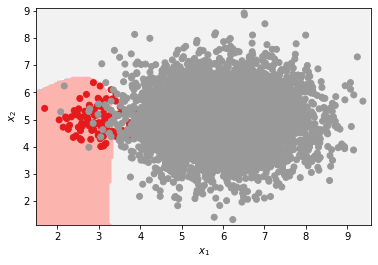

In [9]:
test_model(model_poly, X_poly, y_poly, n_tests=100)

AUC score: 0.894


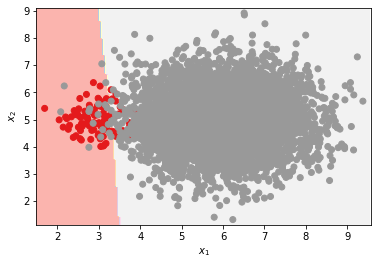

In [10]:
test_model(model_rbf, X_poly, y_poly, n_tests=100);

# RBF performing better

In [11]:
def G_SVC_rbf():

    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 
   
    return X, y

In [12]:
X_rbf, y_rbf = G_SVC_rbf()

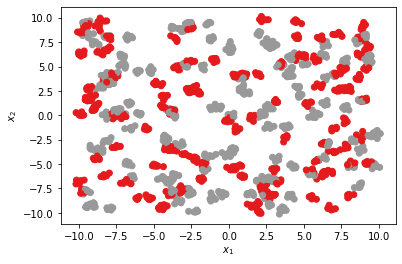

In [13]:
plot_2d(X_rbf, y_rbf)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_rbf,
                                                    y_rbf,
                                                    test_size=.33,
                                                    random_state=42)

In [15]:
param_grid_rbf = {'C': [0.001,0.01,0.1,1,5,10,15,20,30,40,50,60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train);

In [16]:
model_rbf = SVC(kernel='rbf',
                random_state=42,
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'])

In [ ]:
param_grid_poly = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50],
                   'kernel': ['poly'],
                   'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                   'degree': [2]}

grid_poly = GridSearchCV(SVC(), param_grid_poly)
grid_poly.fit(X_train, y_train);

In [ ]:
model_poly = SVC(kernel='poly',
                 degree=grid_poly.best_params_['degree'],
                 C=grid_poly.best_params_['C'],
                 gamma=grid_poly.best_params_['gamma'],
                 random_state=42)

In [ ]:
test_model(model_poly, X_rbf, y_rbf)

In [ ]:
test_model(model_rbf, X_rbf, y_rbf);